In [38]:
import pandas as pd
from darts.models import NBEATSModel
from darts.utils.likelihood_models.torch import LaplaceLikelihood
from darts.utils.callbacks import TFMProgressBar
from darts import TimeSeries

In [39]:
df = pd.read_csv("output.csv")

In [40]:
df0 = df[df["Product_ID"]==0]
df0.pop("Product_Category")
df0_target = df0.loc[:,["Time_Unitless", "Total_Amount"]]
df0.pop("Total_Amount")
df0.head()

,Age,Male,Female,Quantity,Product_ID,Price_per_Unit,Time_Unitless,Year,Month,Week,Window_Mean_4,Window_Mean_5,Window_Mean_6,Window_Mean_7
0,19.0,0,1,1,0,25,0,2023,1,1,81.25,80.0,70.83,78.57
1,19.0,1,0,2,0,25,1,2023,1,2,81.25,80.0,70.83,78.57
2,34.0,1,2,10,0,25,2,2023,1,3,81.25,80.0,70.83,78.57
3,0.0,0,0,0,0,25,3,2023,1,4,81.25,80.0,70.83,78.57
4,23.0,0,1,3,0,25,4,2023,1,5,93.75,80.0,70.83,78.57


In [41]:
target0 = TimeSeries.from_dataframe(df0_target, time_col="Time_Unitless")
covariates0 = TimeSeries.from_dataframe(df0, time_col="Time_Unitless")

In [42]:
def generate_torch_kwargs():
    # run torch models on CPU, and disable progress bars for all model stages except training.
    return {
        "pl_trainer_kwargs": {
            "accelerator": "cpu",
            "callbacks": [TFMProgressBar(enable_train_bar_only=True)],
        }
    }

In [43]:
model = NBEATSModel(
    input_chunk_length=8,
    output_chunk_length=4,
    n_epochs=100,
    random_state=0,
    **generate_torch_kwargs(),
)

In [44]:
model.fit(
    target0, 
    epochs=400, 
    verbose=True,
    past_covariates=[covariates0]
)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/corcasta/miniconda3/envs/farama/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.9 M  | train
-------------------------------------------------------------
6.9 M     Trainable params
2.0 K     Non-trainable params
6.9 M     Total params
27.586    Total estimated model params size (MB)
396       Modules in train mode
0         Modul

Epoch 399: 100%|██████████| 2/2 [00:00<00:00,  9.14it/s, train_loss=6.87e-5] 

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 399: 100%|██████████| 2/2 [00:00<00:00,  9.09it/s, train_loss=6.87e-5]


NBEATSModel(output_chunk_shift=0, generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=8, output_chunk_length=4, n_epochs=100, random_state=0, pl_trainer_kwargs={'accelerator': 'cpu', 'callbacks': [<darts.utils.callbacks.TFMProgressBar object at 0x793563418bb0>]})

In [60]:
pred = model.predict(
    n=4,
    series=valid_series,
    past_covariates=[valid_covariates]
)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/corcasta/miniconda3/envs/farama/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


<Axes: xlabel='Time_Unitless'>

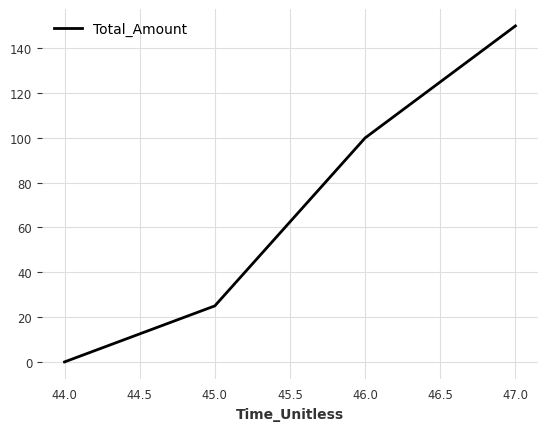

In [61]:

pred.plot()

In [62]:
df0_target.iloc[-8:,:]

,Time_Unitless,Total_Amount
44,44,0
45,45,25
46,46,100
47,47,150
48,48,25
49,49,175
50,50,50
51,51,25


In [63]:
valid_series = TimeSeries.from_dataframe(df0_target.iloc[-16:-8,:], time_col="Time_Unitless")
valid_covariates = TimeSeries.from_dataframe(df0.iloc[-16:-8:,:], time_col="Time_Unitless")

<Axes: xlabel='Time_Unitless'>

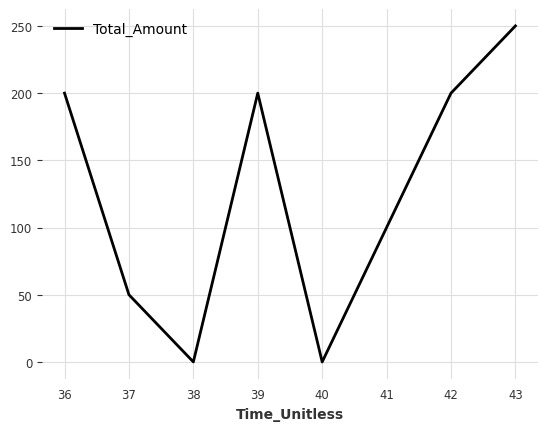

In [57]:
valid_series.plot()